<a href="https://colab.research.google.com/github/44244432664/AIproj/blob/main/stuperf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# from sklearn import tree
# t = tree.DecisionTreeClassifier(criterion = "entropy")
# t = t.fit(train_attributes, train_labels)
# t = t.score(test_attributes, train_labels)
# t.predict(example_attributes)
# cross_val_score(t, all_attributes, all_labels)

from sklearn import tree
import pandas as pd

d = pd.read_csv('student/student-por.csv', sep = ';')

In [13]:
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [14]:
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                               'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [19]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing student in whole dataset
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass))/len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [20]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t = t.fit(d_train_att, d_train_pass)

In [21]:
# save tree
tree.export_graphviz(t, out_file="student_performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"], filled=True, rounded=True)

In [22]:
t.score(d_test_att, d_test_pass)

0.6375838926174496

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show avg score and +/- 2 sd away (covering 95% of scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.67 (+/- 0.08)


In [24]:
for max_depth in range(1, 20):
  t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
  scores = cross_val_score(t, d_att, d_pass, cv=5)
  print('MAx depth: %d, Accuracy: %0.2f (+/- %0.2f)' % (max_depth, scores.mean(), scores.std()*2))

MAx depth: 1, Accuracy: 0.64 (+/- 0.04)
MAx depth: 2, Accuracy: 0.69 (+/- 0.06)
MAx depth: 3, Accuracy: 0.69 (+/- 0.04)
MAx depth: 4, Accuracy: 0.70 (+/- 0.06)
MAx depth: 5, Accuracy: 0.67 (+/- 0.08)
MAx depth: 6, Accuracy: 0.67 (+/- 0.07)
MAx depth: 7, Accuracy: 0.67 (+/- 0.07)
MAx depth: 8, Accuracy: 0.69 (+/- 0.05)
MAx depth: 9, Accuracy: 0.67 (+/- 0.04)
MAx depth: 10, Accuracy: 0.66 (+/- 0.05)
MAx depth: 11, Accuracy: 0.67 (+/- 0.08)
MAx depth: 12, Accuracy: 0.67 (+/- 0.03)
MAx depth: 13, Accuracy: 0.66 (+/- 0.08)
MAx depth: 14, Accuracy: 0.66 (+/- 0.06)
MAx depth: 15, Accuracy: 0.63 (+/- 0.11)
MAx depth: 16, Accuracy: 0.64 (+/- 0.06)
MAx depth: 17, Accuracy: 0.63 (+/- 0.06)
MAx depth: 18, Accuracy: 0.64 (+/- 0.10)
MAx depth: 19, Accuracy: 0.66 (+/- 0.04)


In [25]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
  t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
  scores = cross_val_score(t, d_att, d_pass, cv=5)
  depth_acc[i,0] = max_depth
  depth_acc[i,1] = scores.mean()
  depth_acc[i,2] = scores.std()*2
  i+=1

depth_acc

array([[ 1.        ,  0.63785331,  0.03848481],
       [ 2.        ,  0.68714371,  0.06198029],
       [ 3.        ,  0.68565295,  0.03871681],
       [ 4.        ,  0.69639833,  0.05774093],
       [ 5.        ,  0.67174717,  0.08155657],
       [ 6.        ,  0.6732737 ,  0.05481684],
       [ 7.        ,  0.67174717,  0.05526157],
       [ 8.        ,  0.67949911,  0.03477418],
       [ 9.        ,  0.66560525,  0.0419388 ],
       [10.        ,  0.67018485,  0.06798033],
       [11.        ,  0.66411449,  0.06463111],
       [12.        ,  0.67169946,  0.07344987],
       [13.        ,  0.65328563,  0.06137037],
       [14.        ,  0.647096  ,  0.08598225],
       [15.        ,  0.6225164 ,  0.13174277],
       [16.        ,  0.64405486,  0.10468078],
       [17.        ,  0.6456768 ,  0.10710963],
       [18.        ,  0.6425164 ,  0.11791952],
       [19.        ,  0.6425641 ,  0.0684649 ]])

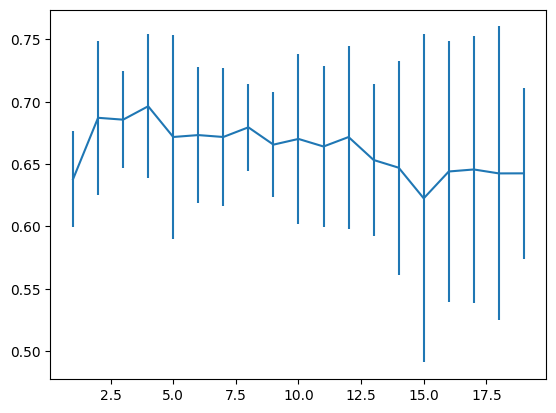

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()